#q2


In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Loading the image and converting it to grayscale
img = Image.open('dip.jpg').convert('L')
img_array = np.array(img)


In [3]:
def floyd_steinberg_dithering(img):
    img = img.copy()
    h, w = img.shape
    
    for y in range(h):
        for x in range(w):
            old_pixel = img[y, x]
            new_pixel = 255 * (old_pixel // 128)
            img[y, x] = new_pixel
            error = old_pixel - new_pixel
            
            # Distributing the error
            if x + 1 < w:
                img[y, x + 1] += error * 7 / 16
            if x - 1 >= 0 and y + 1 < h:
                img[y + 1, x - 1] += error * 3 / 16
            if y + 1 < h:
                img[y + 1, x] += error * 5 / 16
            if x + 1 < w and y + 1 < h:
                img[y + 1, x + 1] += error * 1 / 16
    
    return img

fs_dithered = floyd_steinberg_dithering(img_array)


In [4]:
def jjn_dithering(img):
    img = img.copy()
    h, w = img.shape
    
    #  JJN matrix for error diffusion
    jjn_matrix = [
        [0, 0, 0, 7, 5],
        [3, 5, 7, 5, 3],
        [1, 3, 5, 3, 1]
    ]
    jjn_divisor = 48

    for y in range(h):
        for x in range(w):
            old_pixel = img[y, x]
            new_pixel = 255 * (old_pixel // 128)
            img[y, x] = new_pixel
            error = old_pixel - new_pixel

            # Spread the error using the JJN matrix
            for dy in range(3):
                for dx in range(-2, 3):
                    nx, ny = x + dx, y + dy
                    if 0 <= nx < w and 0 <= ny < h:
                        img[ny, nx] += error * jjn_matrix[dy][dx + 2] / jjn_divisor

    return img

jjn_dithered = jjn_dithering(img_array)


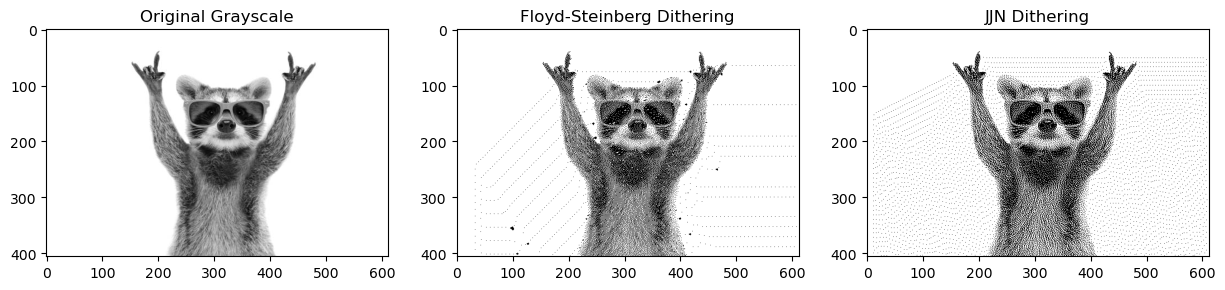

In [5]:
# Showing the results
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1), plt.imshow(img_array, cmap='gray'), plt.title('Original Grayscale')
plt.subplot(1, 3, 2), plt.imshow(fs_dithered, cmap='gray'), plt.title('Floyd-Steinberg Dithering')
plt.subplot(1, 3, 3), plt.imshow(jjn_dithered, cmap='gray'), plt.title('JJN Dithering')
plt.show()


Comparision:
Floyd-Steinberg: Generates a pattern that appears more "grainy" or "noisy".
fewer calculations mean faster processing.

Jarvis-Judice-Ninke: Produces gradients that are smoother and have less dithering artifacts.
slower as a result of an intricate error distribution.
